In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

from .epitools import between_p, within_p

ImportError: attempted relative import with no known parent package

In [ ]:
from random import sample

In [ ]:
sample([3, 2, 1], 2)

[3, 1]

In [ ]:
VOTES_POLLING = 0
RATE_THRESHOLD = 0
output = []

for country, year, election in [
    ("France", 2002, "first_round"),
    ("France", 2007, "first_round"),
    ("France", 2012, "first_round"),
    ("France", 2017, "first_round"),
    ("France", 2022, "first_round"),
    ("United States", 2000, "first_round"),
    ("United States", 2004, "first_round"),
    ("United States", 2008, "first_round"),
    ("United States", 2012, "first_round"),
    ("United States", 2016, "first_round"),
    ("United States", 2020, "first_round"),
    # ("Chile", 2013, "first_round"),
    # ("Chile", 2017, "first_round"),
    # ("Chile", 2021, "first_round")
]:
    print(country, year)
    df = pd.read_csv(f"data_output/{country}/{year}_{election}.csv.gz")
    if "flag_candidates" in list(df):
        df = df[df["flag_candidates"] == 1]

    ee = df.groupby("polling_id").agg({"value": "sum"})
    dd = df.groupby("candidate").agg({"value": "sum"})
    dd["rate"] = dd.apply(lambda x: x/x.sum())
    dd = dd.sort_values("rate", ascending=False)

    if country == "United States":
        values = list(dd.head(2).index.unique())
    elif country == "France":
        values = list(dd.head(8).index.unique())
    elif country == "Chile":
        values = list(dd.head(4).index.unique())

    df = df[df["candidate"].isin(values)].copy()

    tt = df.groupby(["polling_id", "candidate"]).agg({"value": "sum"})
    tt["rate"] = tt.groupby(level=[0], group_keys=False).apply(lambda x: x/x.sum())
    tt = tt.reset_index()

    df = tt.copy()

    N = len(df["candidate"].unique())
    units = list(df["polling_id"].unique())
    N_units = len(units)
    

    df_frag = df.copy()

    df_a = between_p(df_frag)
    df_b = within_p(df_frag)

    data = pd.merge(df_a, df_b, on=["candidate"])

    output.append({
        "country": country,
        "year": year,
        "N": N,
        "N_units": N_units,
        "value": np.sum((data["value_x"] + data["value_y"])),
        "ec": np.sum(data["value_x"]),
        "ep": np.sum(data["value_y"])
    })

df = pd.DataFrame(output)
df

France 2002
France 2007
France 2012
France 2017
France 2022
United States 2000
United States 2004
United States 2008
United States 2012
United States 2016
United States 2020


,country,year,N,N_units,value,ec,ep
0,France,2002,8,64141,0.935201,0.892257,0.042944
1,France,2007,8,65613,0.888795,0.848168,0.040627
2,France,2012,8,67933,0.894664,0.851333,0.043331
3,France,2017,8,35711,0.904468,0.860977,0.043492
4,France,2022,8,69682,0.904455,0.848585,0.055870
5,United States,2000,2,3157,1.000354,0.790305,0.210049
6,United States,2004,2,3158,0.998311,0.780116,0.218195
7,United States,2008,2,3158,0.991714,0.764023,0.227691
8,United States,2012,2,3158,0.997476,0.749278,0.248198
9,United States,2016,2,3158,0.999022,0.704033,0.294989


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


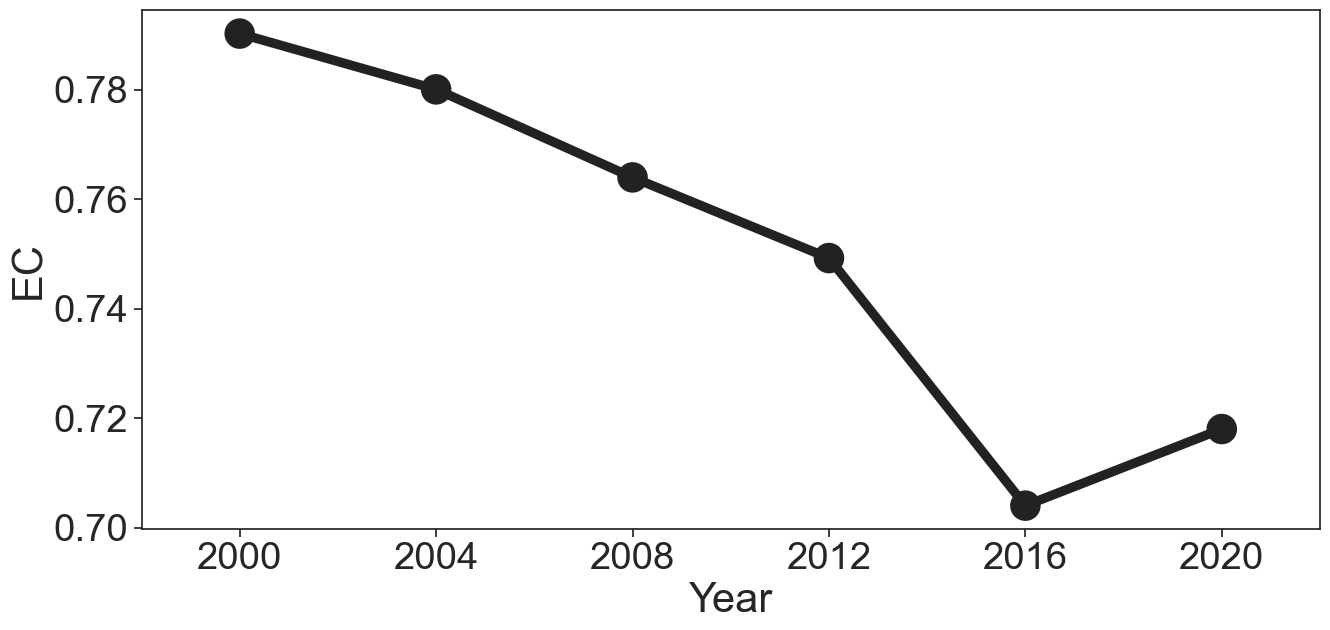

In [ ]:
sns.set(font_scale=2.5, style="ticks")
fig, ax = plt.subplots(figsize=(14, 7))
data = df[df["country"] == "United States"]

sns.pointplot(x="year", y="ec", color="#222222", scale=2.5, dodge=0.15, data=data)

ax.set_ylabel("EC")
ax.set_xlabel("Year")

leg = ax.legend()
leg.remove()

fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


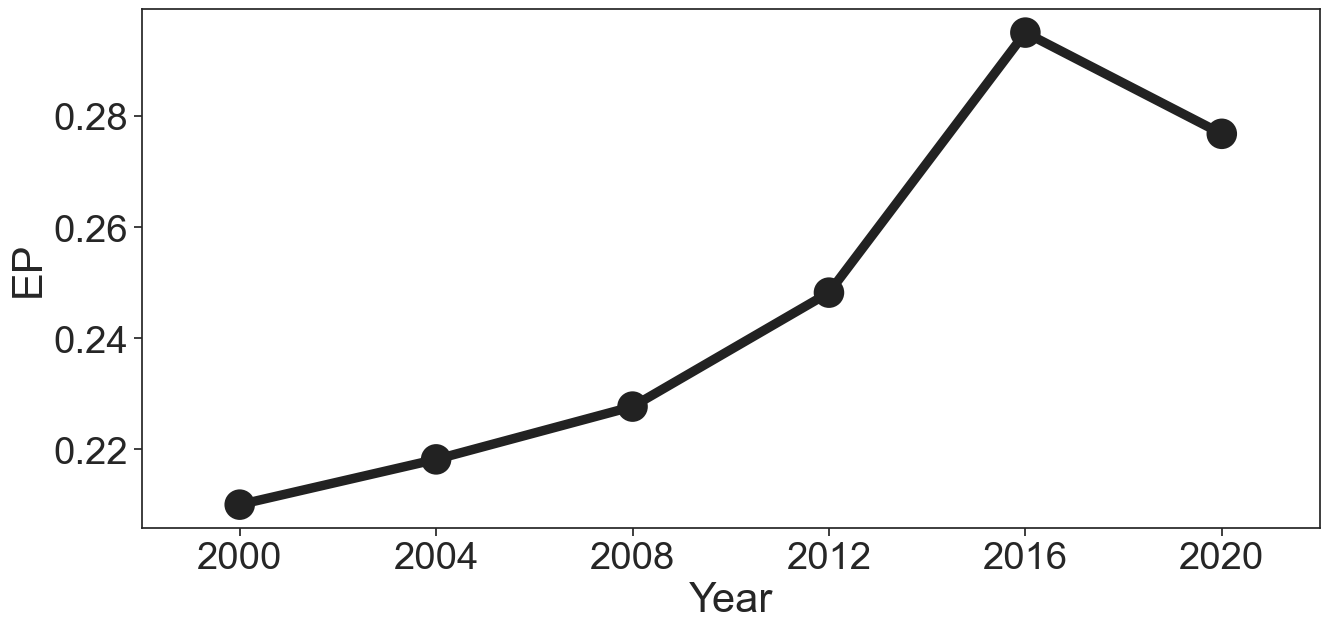

In [ ]:
sns.set(font_scale=2.5, style="ticks")
fig, ax = plt.subplots(figsize=(14, 7))
data = df[df["country"] == "United States"]

sns.pointplot(x="year", y="ep", color="#222222", scale=2.5, dodge=0.15, data=data)
ax.set_ylabel("ED")
ax.set_xlabel("Year")

leg = ax.legend()
leg.remove()

fig.tight_layout()